In [17]:
'''
so we suspect that possibly 

To compare patterns:
use a % change calculation to calculate similarity between each %change
movement in the pattern finder. From those numbers, subtract them from 100, to
get a "how similar" #. From this point, take all 10 of the how similars,
and average them. Whichever pattern is MOST similar, is the one we will assume
we have found. 
'''
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import time
from datetime import datetime 
from functools import reduce

totalStart = time.time()
date_converter = lambda x: mdates.date2num(datetime.strptime(x.decode('ascii'), '%Y%m%d%H%M%S'))
date, bid, ask = np.loadtxt('GBPUSD1d.txt', unpack=True, delimiter=',', converters={0: date_converter})
avgLine = ((bid+ask)/2)

####DEFINE######
#CHANGE#
patternAr = []
performanceAr = []
patForRec = []

def percentChange(startPoint, currentPoint):
    try:
        x = ((float(currentPoint)-startPoint)/abs(startPoint))*100.00
        if x == 0.0:
            return 0.000000001
        else:
            return x
    except:
        return 0.0001
    #return ((float(currentPoint)-startPoint)/abs(startPoint))*100.00

def patternStorage():
    '''
    The goal of patternFinder is to begin collection of %change patterns
    in the tick data. From there, we also collect the short-term outcome
    of this pattern. Later on, the length of the pattern, how far out we
    look to compare to, and the length of the compared range be changed,
    and even THAT can be machine learned to find the best of all 3 by
    comparing success rates.
    '''
    
    #####
    startTime = time.time()

    # required to do a pattern array, because the liklihood of an identical
    # %change across millions of patterns is fairly likely and would
    # cause problems. IF it was a problem of identical patterns,
    # then it wouldnt matter, but the % change issue
    # would cause a lot of harm. Cannot have a list as a dictionary Key.
    
    #MOVE THE ARRAYS THEMSELVES#
    
    x = len(avgLine)-30
    y = 11
    currentStance = 'none'
    
    while y < x:
        pattern = []
        p1 = percentChange(avgLine[y-10], avgLine[y-9])
        p2 = percentChange(avgLine[y-10], avgLine[y-8])
        p3 = percentChange(avgLine[y-10], avgLine[y-7])
        p4 = percentChange(avgLine[y-10], avgLine[y-6])
        p5 = percentChange(avgLine[y-10], avgLine[y-5])
        p6 = percentChange(avgLine[y-10], avgLine[y-4])
        p7 = percentChange(avgLine[y-10], avgLine[y-3])
        p8 = percentChange(avgLine[y-10], avgLine[y-2])
        p9 = percentChange(avgLine[y-10], avgLine[y-1])
        p10 = percentChange(avgLine[y-10], avgLine[y])

        outcomeRange = avgLine[y+20:y+30]
        currentPoint = avgLine[y]
        #Define##########################
        #########change to try except for safety
        
        try:
            avgOutcome = reduce(lambda x, y: x + y, outcomeRange) / len(outcomeRange)
        except Exception as e:
            print(str(e))
            avgOutcome = 0
        #Define
        futureOutcome = percentChange(currentPoint, avgOutcome)

        #print some logics
        '''
        print 'where we are historically:',currentPoint
        print 'soft outcome of the horizon:',avgOutcome
        print 'This pattern brings a future change of:',futureOutcome
        print '_______'
        print p1, p2, p3, p4, p5, p6, p7, p8, p9, p10
        '''

        pattern.append(p1)
        pattern.append(p2)
        pattern.append(p3)
        pattern.append(p4)
        pattern.append(p5)
        pattern.append(p6)
        pattern.append(p7)
        pattern.append(p8)
        pattern.append(p9)
        pattern.append(p10)

        #can use .index to find the index value, then search for that value to get the matching information.
        # so like, performanceAr.index(12341)
        patternAr.append(pattern)
        performanceAr.append(futureOutcome)
        
        y+=1
    #####
    endTime = time.time()
    print(len(patternAr))
    print(len(performanceAr))
    print('Pattern storing took:', endTime-startTime)
    #####
        
def currentPattern():
    mostRecentPoint = avgLine[-1]

    cp1 = percentChange(avgLine[-11],avgLine[-10])
    cp2 = percentChange(avgLine[-11],avgLine[-9])
    cp3 = percentChange(avgLine[-11],avgLine[-8])
    cp4 = percentChange(avgLine[-11],avgLine[-7])
    cp5 = percentChange(avgLine[-11],avgLine[-6])
    cp6 = percentChange(avgLine[-11],avgLine[-5])
    cp7 = percentChange(avgLine[-11],avgLine[-4])
    cp8 = percentChange(avgLine[-11],avgLine[-3])
    cp9 = percentChange(avgLine[-11],avgLine[-2])
    cp10= percentChange(avgLine[-11],avgLine[-1])

    patForRec.append(cp1)
    patForRec.append(cp2)
    patForRec.append(cp3)
    patForRec.append(cp4)
    patForRec.append(cp5)
    patForRec.append(cp6)
    patForRec.append(cp7)
    patForRec.append(cp8)
    patForRec.append(cp9)
    patForRec.append(cp10)

    #print(patForRec)
    
def graphRawFX():
    fig = plt.figure(figsize=(10,7))
    ax1 = plt.subplot2grid((40,40), (0,0), rowspan=40, colspan=40)

    ax1.plot(date,bid)
    ax1.plot(date,ask)

    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1_2 = ax1.twinx()
    ax1_2.fill_between(date, 0, (ask-bid), facecolor='g', alpha=.3)

    plt.subplots_adjust(bottom=.23)

    plt.grid(True)
    plt.show()

def patternRecognition():
    for eachPattern in patternAr:
        sim1 = 100.00 - abs(percentChange(eachPattern[0], patForRec[0]))
        sim2 = 100.00 - abs(percentChange(eachPattern[1], patForRec[1]))
        sim3 = 100.00 - abs(percentChange(eachPattern[2], patForRec[2]))
        sim4 = 100.00 - abs(percentChange(eachPattern[3], patForRec[3]))
        sim5 = 100.00 - abs(percentChange(eachPattern[4], patForRec[4]))
        sim6 = 100.00 - abs(percentChange(eachPattern[5], patForRec[5]))
        sim7 = 100.00 - abs(percentChange(eachPattern[6], patForRec[6]))
        sim8 = 100.00 - abs(percentChange(eachPattern[7], patForRec[7]))
        sim9 = 100.00 - abs(percentChange(eachPattern[8], patForRec[8]))
        sim10 = 100.00 - abs(percentChange(eachPattern[9], patForRec[9]))
        howSim = (sim1+sim2+sim3+sim4+sim5+sim6+sim7+sim8+sim9+sim10)/10.00

        if howSim > 70:
            patdex = patternAr.index(eachPattern)
            print('##################################')            
            print("patternRecognition: ", patdex)
            xp = [1,2,3,4,5,6,7,8,9,10]
            fig = plt.figure()
            plt.plot(xp, patForRec)
            plt.plot(xp, eachPattern)
            plt.show()
            print("patForRec: ", patForRec)
            print('===================================')
            print("eachPattern: ", eachPattern)
            print('----------')
            print('predicted outcome:',performanceAr[patdex])
            print('##################################')
            print('##################################')

61971
61971
Pattern storing took: 1.0367441177368164
##################################
patternRecognition:  6426


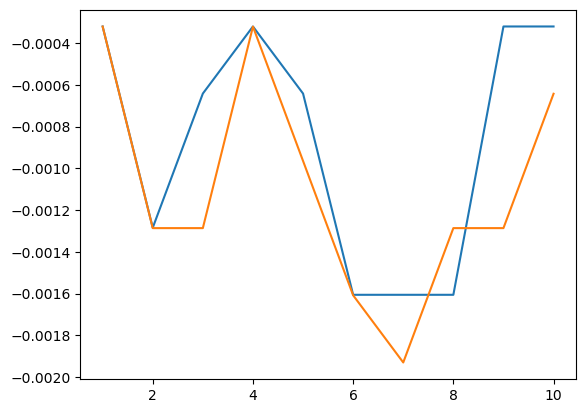

patForRec:  [-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
eachPattern:  [-0.000321600282996074, -0.0012864011320271418, -0.0012864011320271418, -0.000321600282996074, -0.0009648008490167858, -0.0016080014150374978, -0.0019296016980335717, -0.0012864011320271418, -0.0012864011320271418, -0.0006432005660207119]
----------
predicted outcome: -0.0013507298765257116
##################################
##################################
##################################
patternRecognition:  14644


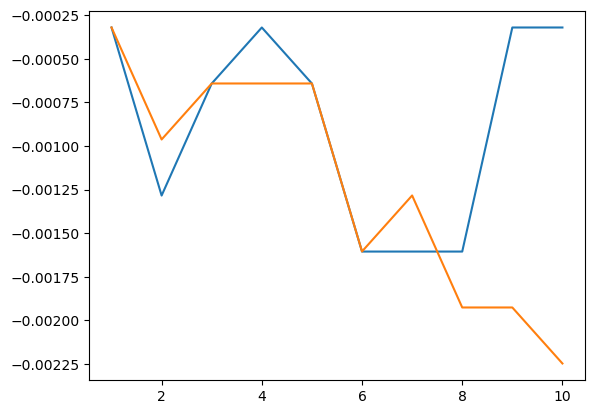

patForRec:  [-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
eachPattern:  [-0.0003210262567253853, -0.0009630787702046686, -0.0006420525134792833, -0.0006420525134792833, -0.0006420525134792833, -0.0016051312836839523, -0.0012841050269443103, -0.0019261575404093372, -0.0019261575404093372, -0.0022471837971632354]
----------
predicted outcome: -0.01765684090221983
##################################
##################################
##################################
patternRecognition:  16623


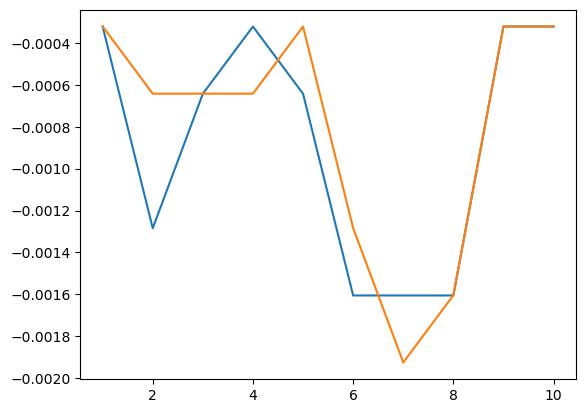

patForRec:  [-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
eachPattern:  [-0.00032095001205198107, -0.0006419000240754561, -0.0006419000240754561, -0.0006419000240754561, -0.00032095001205198107, -0.0012838000481509122, -0.0019257000722263681, -0.0016047500601886402, -0.00032095001205198107, -0.00032095001205198107]
----------
predicted outcome: 0.01418603606206081
##################################
##################################
##################################
patternRecognition:  30509


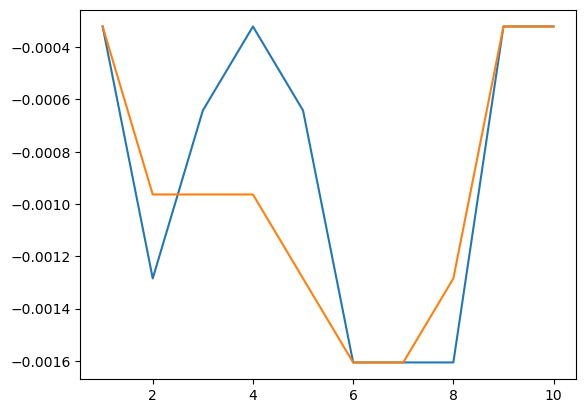

patForRec:  [-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
eachPattern:  [-0.0003211510052190121, -0.0009634530156285126, -0.0009634530156285126, -0.0009634530156285126, -0.0012846040208190008, -0.001605755026023751, -0.001605755026023751, -0.0012846040208190008, -0.0003211510052190121, -0.0003211510052190121]
----------
predicted outcome: 0.017920283641501986
##################################
##################################
##################################
patternRecognition:  41451


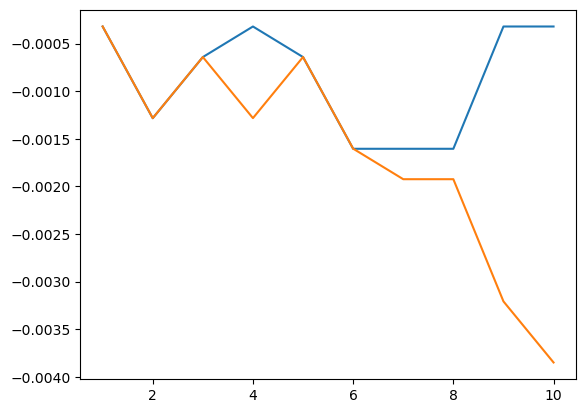

patForRec:  [-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
eachPattern:  [-0.00032085836030178654, -0.0012834334411501503, -0.0006417167205750752, -0.0012834334411501503, -0.0006417167205750752, -0.0016042918014376878, -0.0019251501617252255, -0.0019251501617252255, -0.0032085836028753756, -0.003850300323436202]
----------
predicted outcome: -0.00301618471886144
##################################
##################################
##################################
patternRecognition:  51251


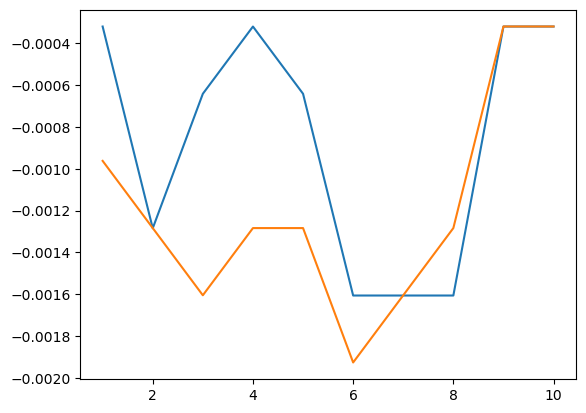

patForRec:  [-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
eachPattern:  [-0.0009626801013943602, -0.0012835734685305638, -0.0016044668356667673, -0.0012835734685305638, -0.0012835734685305638, -0.001925360202802971, -0.0016044668356667673, -0.0012835734685305638, -0.00032089336712195306, -0.00032089336712195306]
----------
predicted outcome: -0.008311164878743222
##################################
##################################
##################################
patternRecognition:  51619


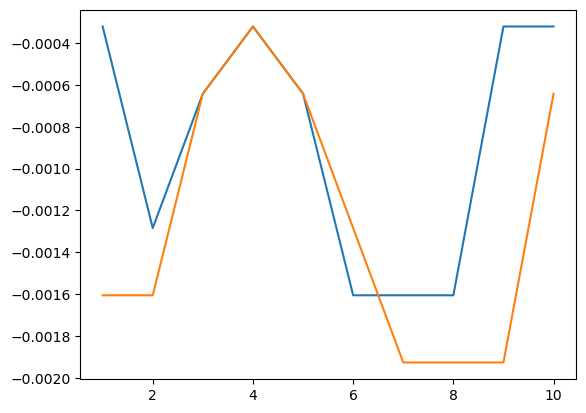

patForRec:  [-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
eachPattern:  [-0.0016055797106065712, -0.0016055797106065712, -0.0006422318842483326, -0.0003211159421099059, -0.0006422318842483326, -0.0012844637684966652, -0.0019266956527307375, -0.0019266956527307375, -0.0019266956527307375, -0.0006422318842483326]
----------
predicted outcome: -0.015060434408430974
##################################
##################################
##################################
patternRecognition:  60785


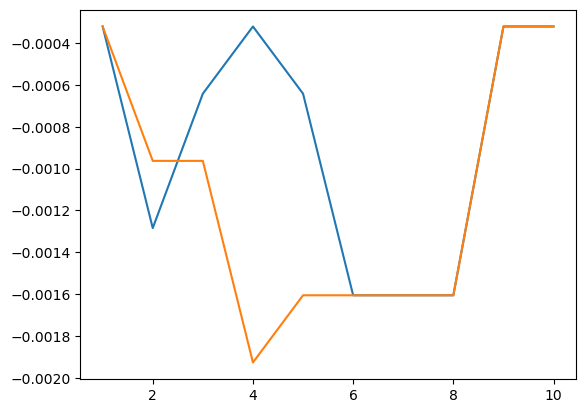

patForRec:  [-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
eachPattern:  [-0.000321132441429342, -0.0009633973243165482, -0.0009633973243165482, -0.0019267946486330964, -0.0016056622072037545, -0.0016056622072037545, -0.0016056622072037545, -0.0016056622072037545, -0.000321132441429342, -0.000321132441429342]
----------
predicted outcome: -0.02386021702201313
##################################
##################################
Entire processing took: 10.727542638778687 seconds


In [19]:
patternStorage()
currentPattern()
patternRecognition()
totalEnd = time.time()-totalStart
print('Entire processing took:',totalEnd,'seconds')